Imported all the necessary librairies

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Read csv file

In [498]:
churn = pd.read_csv('/content/customer_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [499]:
print("Duplicate rows:", churn.duplicated().sum())

Duplicate rows: 0


In [500]:
churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Descriptive Statistics

In [501]:
# which describes the numerical values
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [502]:
# which describes the categorical values
churn.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7030,7030,7006,7028,7028,7028,7028,7021,7029,7018,7029,7042,7036,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6526,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6349,3382,3081,3492,3083,3090,3466,2802,2780,3860,4165,2365,11,5174


Display Rows and Columns

In [503]:
# Shape of the dataset
print('Number of rows:',churn.shape[0])
print('Number of columns:',churn.shape[1])
churn.shape

Number of rows: 7043
Number of columns: 21


(7043, 21)

Info about dataset

In [504]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [505]:
# Displaying the name of columns
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# **Handling Missing Values**

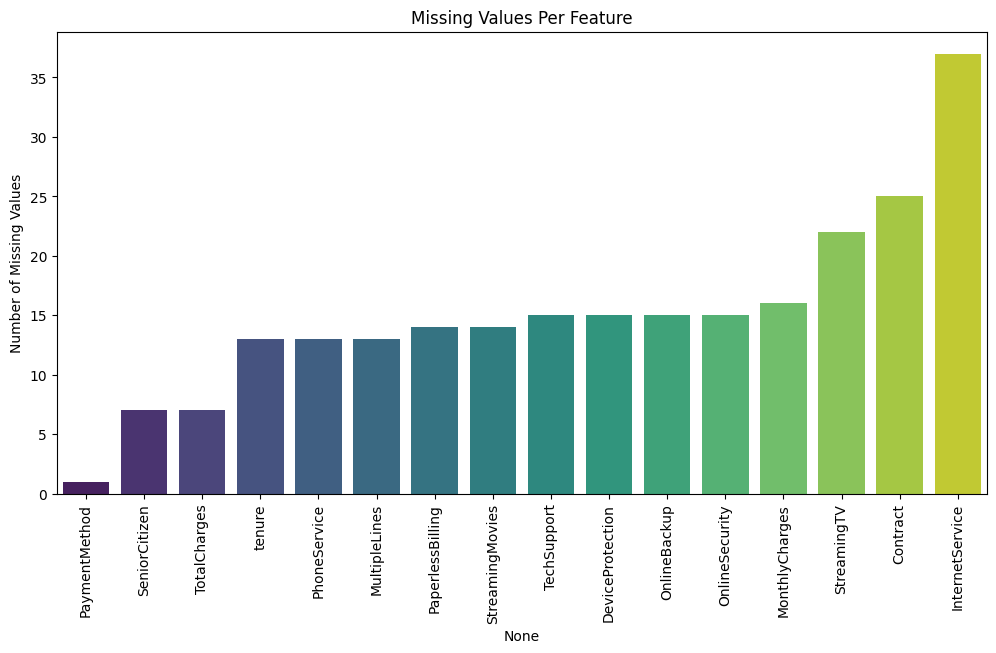

In [506]:
missing_values = churn.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values
plt.figure(figsize=(12, 6))
missing_values = missing_values.sort_values(ascending=True)
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Feature")
plt.show()

In [507]:
print("Missing Values are :")
print("")
print(missing_values)

Missing Values are :

PaymentMethod        1
SeniorCitizen        7
TotalCharges         7
tenure              13
PhoneService        13
MultipleLines       13
PaperlessBilling    14
StreamingMovies     14
TechSupport         15
DeviceProtection    15
OnlineBackup        15
OnlineSecurity      15
MonthlyCharges      16
StreamingTV         22
Contract            25
InternetService     37
dtype: int64


Finding skewness of numerical columns

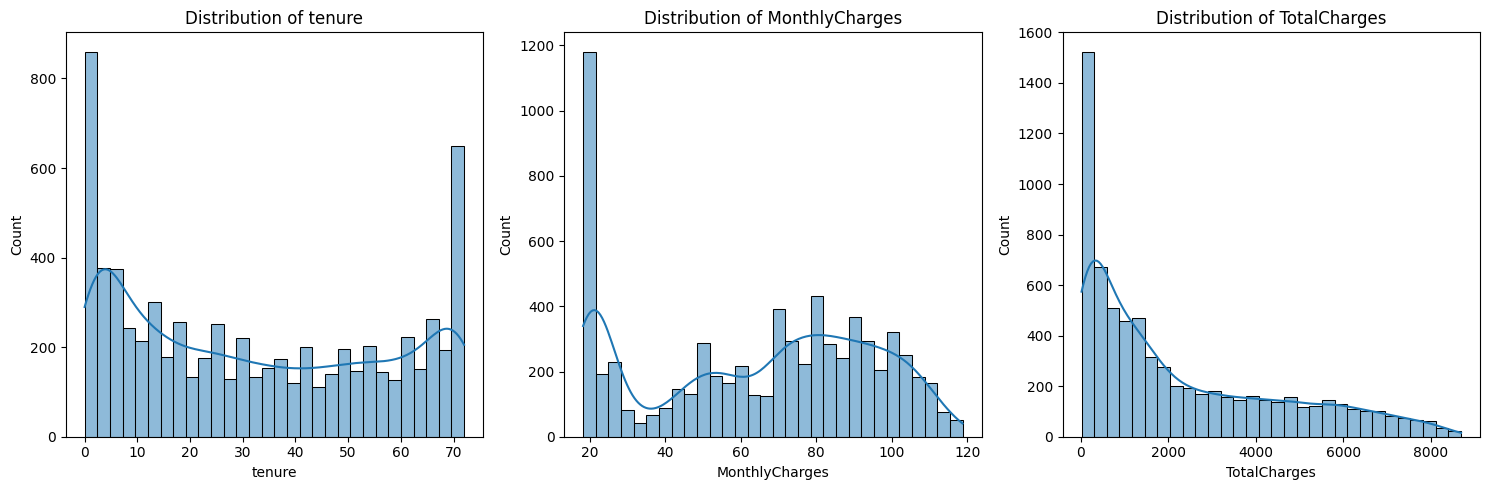

In [542]:
# Plot histograms for numerical columns
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
plt.figure(figsize=(15,5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(churn[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Missing value handling in numerical values filled using median

In [509]:
# Numerical columns
num_cols = ["SeniorCitizen", "tenure", "MonthlyCharges"]
for col in num_cols:
    churn[col] = churn[col].fillna(churn[col].median())

Missing value handling in Categorical values filled using mode

In [510]:
cat_cols = ["PaymentMethod", "PhoneService", "MultipleLines", "PaperlessBilling",
                 "StreamingMovies", "TechSupport", "DeviceProtection", "OnlineSecurity",
                 "OnlineBackup", "StreamingTV","Contract", "InternetService"]
for col in cat_cols:
    churn[col] = churn[col].fillna(churn[col].mode()[0])

converting Totalcharges to numerical value

In [511]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"], errors='coerce')
churn["TotalCharges"] = churn["TotalCharges"].fillna(churn["TotalCharges"].median())

In [512]:
num_cols = churn.select_dtypes(include=['float64', 'int64']).columns
cat_cols = churn.select_dtypes(include=['object']).columns
# Checking  skewness
# If skewness is greater than ±0.5, the feature is skewed,median is a better choice for numerical value and mode is  for categorical value

churn[num_cols].skew()

,0
SeniorCitizen,1.836472
tenure,0.240816
MonthlyCharges,-0.221657
TotalCharges,0.964662


In [513]:
churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **Outliers**


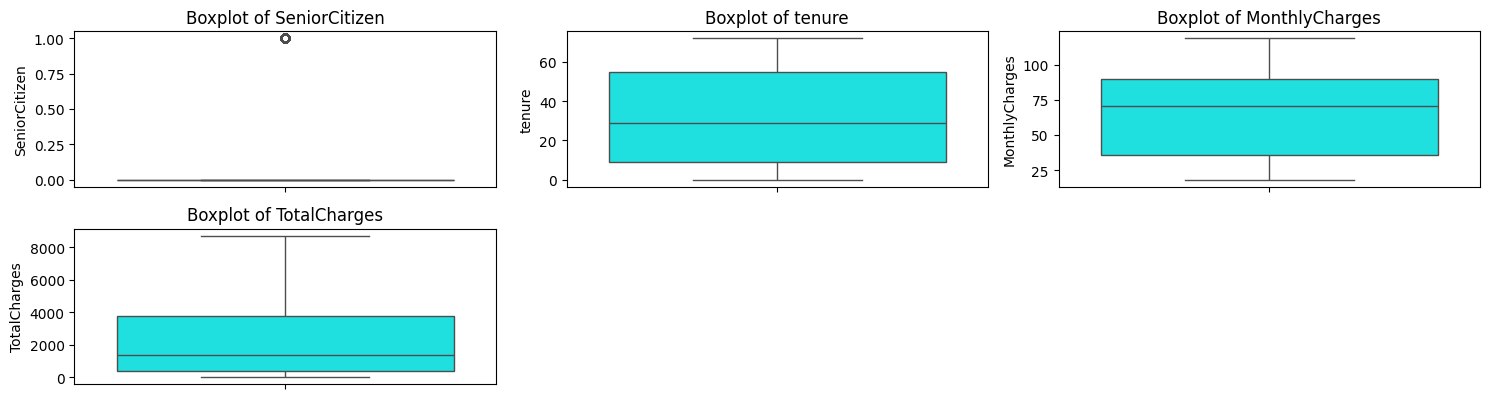

In [514]:
# List of numerical columns to analyze
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=churn[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [515]:
# Function to detect outliers using IQR
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Check outliers for each column
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers(churn, col)
    outlier_counts[col] = len(outliers)

outlier_counts



{'SeniorCitizen': 1140, 'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 0}

# visualizations

Churn by Gender

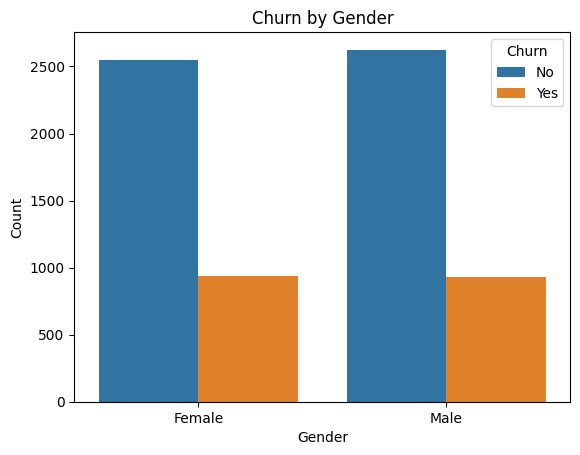

In [516]:
sns.countplot(data=churn, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [517]:
churn.drop(columns=['customerID'], inplace=True)

# Label Encoding

In [518]:
cat_cols = churn.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    churn[col] = le.fit_transform(churn[col])
    print(f"Label encoding for '{col}':")
    for i, class_ in enumerate(le.classes_):
            print(f"  '{class_}' → {i}")

Label encoding for 'gender':
  'Female' → 0
  'Male' → 1
Label encoding for 'Partner':
  'No' → 0
  'Yes' → 1
Label encoding for 'Dependents':
  'No' → 0
  'Yes' → 1
Label encoding for 'PhoneService':
  'No' → 0
  'Yes' → 1
Label encoding for 'MultipleLines':
  'No' → 0
  'No phone service' → 1
  'Yes' → 2
Label encoding for 'InternetService':
  'DSL' → 0
  'Fiber optic' → 1
  'No' → 2
Label encoding for 'OnlineSecurity':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'OnlineBackup':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'DeviceProtection':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'TechSupport':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'StreamingTV':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'StreamingMovies':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'Contract':
  'Month-to-month' → 0
  'One year' → 1
  'Two year' → 2


In [519]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


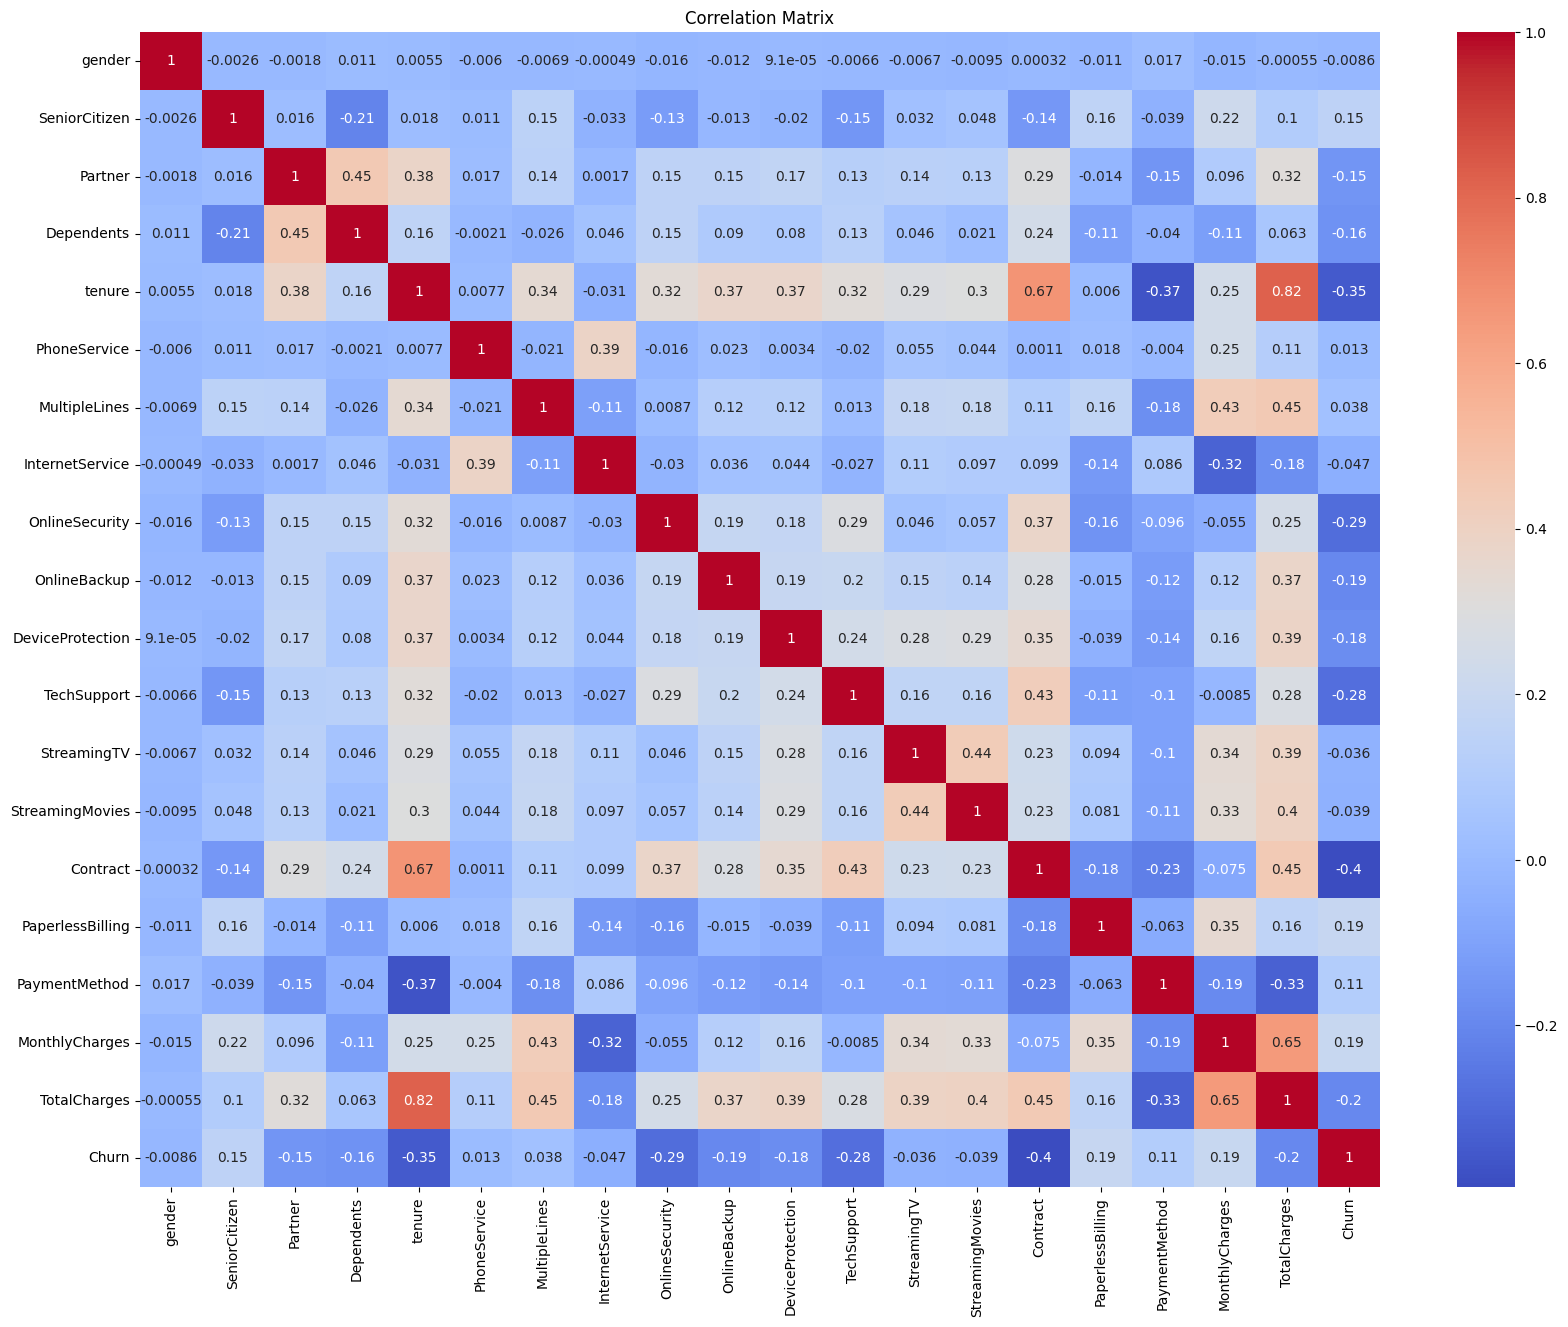

In [520]:
plt.figure(figsize=(20, 15))
sns.heatmap(churn.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Features such as "Contract", "Tenure", "OnlineSecurity" , and "TechSupport"  are negatively correlated with churn, meaning customers with longer contracts, more tenure, and access to these services are less likely to churn. "PaperlessBilling" , "MonthlyCharges" , and "InternetService"  are positively correlated with churn, meaning customers with paperless billing, higher charges, or certain internet services are more likely to churn.  also consider "SeniorCitizen," "Partner," and "PaymentMethod," which have a slight effect on churn. Features like "customerID," "TotalCharges" (highly correlated with "Tenure" and "MonthlyCharges"), "PhoneService," and "MultipleLines" (both correlated) were dropped to reduce redundancy and multicollinearity.

**features and target Selection**

In [521]:
# Select relevant columns
features = [ 'Contract', 'tenure', 'PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'MonthlyCharges', 'InternetService', 'SeniorCitizen', 'Partner', 'PaymentMethod']
target = 'Churn'

In [522]:
# Features and target
X = churn[features]
y = churn[target]

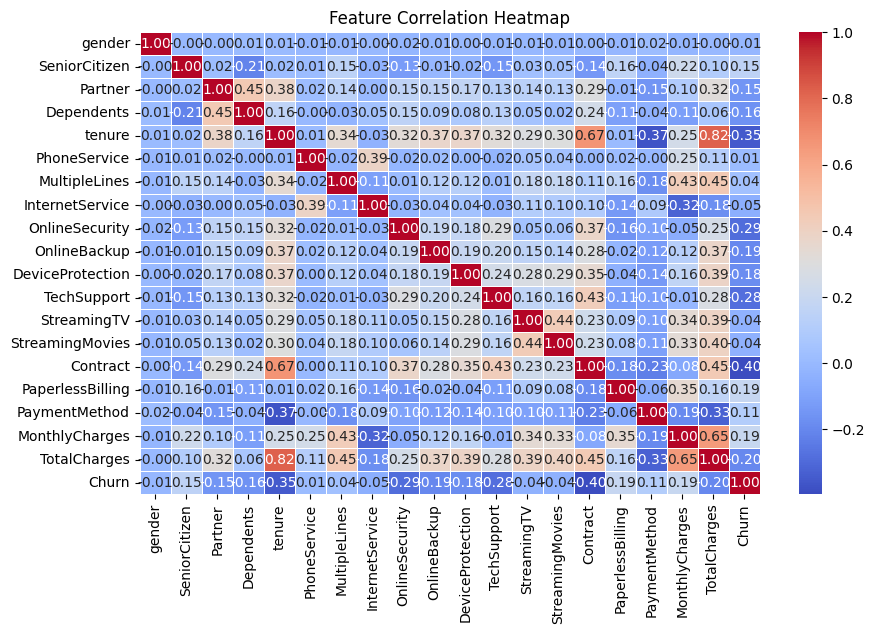

In [523]:
# Calculate the correlation matrix only for numerical features
correlation_matrix = churn.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Standard Scaling**

In [524]:
# Numerical columns to scale
num_features = ['tenure', 'MonthlyCharges']

# Copy of features
X_scaled = X.copy()

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled[num_features] = scaler.fit_transform(X_scaled[num_features])

# Now X_scaled is ready for model training
X_scaled.head()


,Contract,tenure,PaperlessBilling,OnlineSecurity,TechSupport,MonthlyCharges,InternetService,SeniorCitizen,Partner,PaymentMethod
0,0,-1.278143,1,0,0,-1.161823,0,0.0,1,2
1,1,0.066784,0,2,0,-0.260194,0,0.0,0,3
2,0,-1.237388,1,2,0,-0.363332,0,0.0,0,3
3,1,0.515093,0,2,2,-0.747606,0,0.0,0,0
4,0,-1.237388,1,0,0,0.197275,1,0.0,0,2


Spliting The dataset into testing and training

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [526]:
X.head()

,Contract,tenure,PaperlessBilling,OnlineSecurity,TechSupport,MonthlyCharges,InternetService,SeniorCitizen,Partner,PaymentMethod
0,0,1.0,1,0,0,29.85,0,0.0,1,2
1,1,34.0,0,2,0,56.95,0,0.0,0,3
2,0,2.0,1,2,0,53.85,0,0.0,0,3
3,1,45.0,0,2,2,42.30,0,0.0,0,0
4,0,2.0,1,0,0,70.70,1,0.0,0,2


In [527]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# **Model Selection**

# Logistic Regression

In [528]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression
Accuracy: 0.8147622427253371
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix:
 [[932 104]
 [157 216]]


# Support Vector Machine (SVM)

In [529]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.8026969481902059
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.71      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.77      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

Confusion Matrix:
 [[972  64]
 [214 159]]


# Decision Tree

In [530]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree
Accuracy: 0.7288857345635202
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1036
           1       0.49      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.65      1409
weighted avg       0.72      0.73      0.73      1409

Confusion Matrix:
 [[855 181]
 [201 172]]


# Random Forest

In [531]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest
Accuracy: 0.7892122072391767
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[930 106]
 [191 182]]


#  K-Nearest Neighbors (KNN)

In [532]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 0.7707594038325053
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.58      0.49      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Confusion Matrix:
 [[905 131]
 [192 181]]


**Here Logistic Regression gives higher Accuracy than other models so we taking this model to predict**

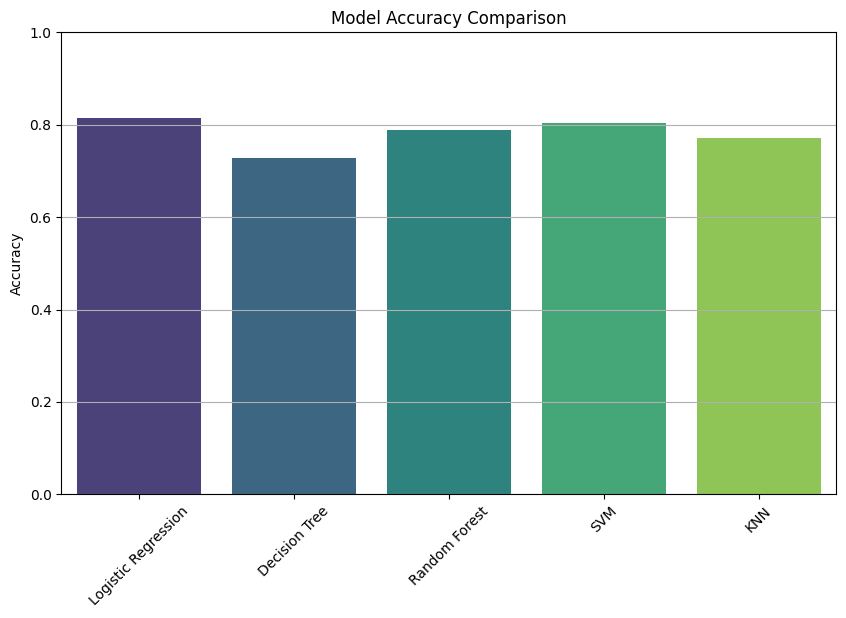

In [533]:
# Store accuracies
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log),
    'Decision Tree': accuracy_score(y_test, y_pred_tree),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'KNN': accuracy_score(y_test, y_pred_knn)
}

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Label encoding for 'gender':
  'Female' → 0
  'Male' → 1

Label encoding for 'Partner':
  'No' → 0
  'Yes' → 1

Label encoding for 'Dependents':
  'No' → 0
  'Yes' → 1

Label encoding for 'PhoneService':
  'No' → 0
  'Yes' → 1

Label encoding for 'MultipleLines':
  'No' → 0
  'No phone service' → 1
  'Yes' → 2

Label encoding for 'InternetService':
  'DSL' → 0
  'Fiber optic' → 1
  'No' → 2

Label encoding for 'OnlineSecurity':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2

Label encoding for 'OnlineBackup':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2

Label encoding for 'DeviceProtection':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2

Label encoding for 'TechSupport':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2

Label encoding for 'StreamingTV':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2
Label encoding for 'StreamingMovies':
  'No' → 0
  'No internet service' → 1
  'Yes' → 2

Label encoding for 'Contract':
  'Month-to-month' → 0
  'One year' → 1
  'Two year' → 2

Label encoding for 'PaperlessBilling':
  'No' → 0
  'Yes' → 1

Label encoding for 'PaymentMethod':
  'Bank transfer (automatic)' → 0
  'Credit card (automatic)' → 1
  'Electronic check' → 2
  'Mailed check' → 3
  
Label encoding for 'Churn':
  'No' → 0
  'Yes' → 1

In [ ]:
pip install ipywidgets --upgrade

In [551]:
import ipywidgets as widgets
from IPython.display import display

# Create input widgets for each feature
contract_widget = widgets.Dropdown(options=churn['Contract'].unique().tolist(), description='Contract:')
tenure_widget = widgets.FloatText(value=1, description='Tenure:')
paperless_billing_widget = widgets.Dropdown(options=churn['PaperlessBilling'].unique().tolist(), description='Paperless Billing:')
online_security_widget = widgets.Dropdown(options=churn['OnlineSecurity'].unique().tolist(), description='Online Security:')
tech_support_widget = widgets.Dropdown(options=churn['TechSupport'].unique().tolist(), description='Tech Support:')
monthly_charges_widget = widgets.FloatText(value=50, description='Monthly Charges:')
internet_service_widget = widgets.Dropdown(options=churn['InternetService'].unique().tolist(), description='Internet Service:')
senior_citizen_widget = widgets.Dropdown(options=churn['SeniorCitizen'].unique().tolist(), description='Senior Citizen:')
partner_widget = widgets.Dropdown(options=churn['Partner'].unique().tolist(), description='Partner:')
payment_method_widget = widgets.Dropdown(options=churn['PaymentMethod'].unique().tolist(), description='Payment Method:')


# Display the widgets
display(contract_widget, tenure_widget, paperless_billing_widget, online_security_widget, tech_support_widget, monthly_charges_widget, internet_service_widget, senior_citizen_widget, partner_widget, payment_method_widget)

# Function to make prediction based on user input
def make_prediction(b):
    input_data = pd.DataFrame([[
        contract_widget.value, tenure_widget.value, paperless_billing_widget.value,
        online_security_widget.value, tech_support_widget.value, monthly_charges_widget.value,
        internet_service_widget.value, senior_citizen_widget.value, partner_widget.value,
        payment_method_widget.value
    ]], columns=features)

    prediction = log_model.predict(input_data)
    churn_status = "Churn" if prediction[0] == 1 else "No Churn"
    print(f"Predicted Churn Status: {churn_status}")

# button to trigger prediction
predict_button = widgets.Button(description="Predict Churn")
predict_button.on_click(make_prediction)

# Display the button
display(predict_button)

Dropdown(description='Contract:', options=(0, 1, 2), value=0)

FloatText(value=1.0, description='Tenure:')

Dropdown(description='Paperless Billing:', options=(1, 0), value=1)

Dropdown(description='Online Security:', options=(0, 2, 1), value=0)

Dropdown(description='Tech Support:', options=(0, 2, 1), value=0)

FloatText(value=50.0, description='Monthly Charges:')

Dropdown(description='Internet Service:', options=(0, 1, 2), value=0)

Dropdown(description='Senior Citizen:', options=(0.0, 1.0), value=0.0)

Dropdown(description='Partner:', options=(1, 0), value=1)

Dropdown(description='Payment Method:', options=(2, 3, 0, 1), value=2)

Button(description='Predict Churn', style=ButtonStyle())

Predicted Churn Status: Churn
